In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *

In [3]:
PATH = Path('/content/data')

In [4]:
src = (ImageList.from_csv(PATH,'train.csv',folder='train',suffix='.jpg')
       .split_by_rand_pct(0.2,42)
       .label_from_df()
      )

In [5]:
tfms = get_transforms(flip_vert=True,xtra_tfms=[cutout()])

In [6]:
def getdata(sz,bs):
    return src.transform(tfms=tfms,size=sz).databunch(bs=bs).normalize(imagenet_stats)

In [7]:
sz = 224
bs = 16

In [8]:
data = getdata(sz,bs)

In [9]:
learn = cnn_learner(data,models.resnet152,metrics=accuracy,callback_fns=[CSVLogger])

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth
100%|██████████| 241530880/241530880 [00:02<00:00, 86193427.50it/s] 


In [10]:
learn.model_dir = '/content/gdrive/My Drive/GardeNerd/resnet151_models'

In [11]:
learn.callbacks = [SaveModelCallback(learn,every='epoch',monitor='accuracy',name='model')]

In [12]:
print(data.classes)
len(data.classes),data.c

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102]


(102, 102)

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.612463,0.275245,0.930421,10:37
1,0.258414,0.095259,0.975189,10:27
2,0.117199,0.037295,0.990291,10:27
3,0.073341,0.023424,0.993528,10:29


In [13]:
learn.save('stage-1')

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 4.79E-06
Min loss divided by 10: 6.31E-06


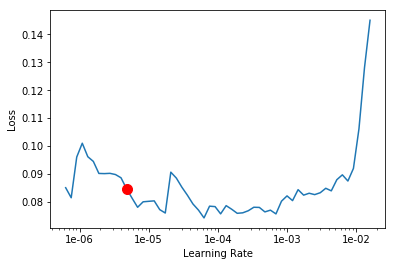

In [15]:
learn.recorder.plot(suggestion=True)

In [16]:
learn.unfreeze()

In [17]:
learn.fit_one_cycle(2,max_lr=slice(4e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.071675,0.023439,0.993528,13:42
1,0.064506,0.022881,0.992718,13:44


In [13]:
learn.load('stage-1');

In [14]:
learn.data  = getdata(400,bs)

In [54]:
#learn.export(file='resnet151_export')

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 6.31E-04


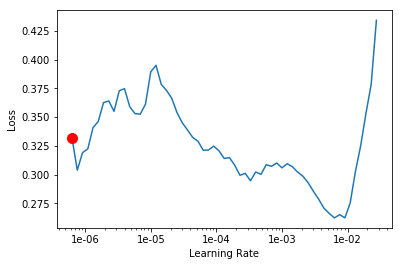

In [17]:
learn.recorder.plot(suggestion=True)

In [18]:
learn.unfreeze()
learn.fit_one_cycle(5,max_lr=slice(3e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.187015,0.036267,0.990022,42:18
1,0.105457,0.020667,0.993528,42:09
2,0.081827,0.014202,0.996224,42:12
3,0.079165,0.012859,0.995955,42:08
4,0.068769,0.011901,0.997573,42:09


In [19]:
learn.save('stage-2')

In [ ]:
learn.fit_one_cycle(5,max_lr=slice(3e-5))

epoch,train_loss,valid_loss,accuracy,time


# Submission

In [51]:
sample_df = pd.read_csv(PATH/'sample_submission.csv')
learn.data.add_test(ImageList.from_csv(PATH,'sample_submission.csv',folder='test',suffix='.jpg'))

preds,y = learn.TTA(ds_type=DatasetType.Test)
sample_df.category = preds.argmax(1) + 1
#sample_df.category = final_preds.argmax(1) + 1
sample_df.to_csv('submission.csv',index=False)

In [52]:
sample_df.head()

,image_id,category
0,18540,9
1,18541,40
2,18542,40
3,18543,72
4,18544,51


In [46]:
sample_df.head()

,image_id,category
0,18540,9
1,18541,40
2,18542,40
3,18543,72
4,18544,51
